In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import LSTM
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
files.upload()

Saving rainfall in india 1901-2015.csv to rainfall in india 1901-2015.csv


{'rainfall in india 1901-2015.csv': b'SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec\r\nANDAMAN & NICOBAR ISLANDS,1901,49.20,87.10,29.20,2.30,528.80,517.50,365.10,481.10,332.60,388.50,558.20,33.60,3373.20,136.30,560.30,1696.30,980.30\r\nANDAMAN & NICOBAR ISLANDS,1902,0.00,159.80,12.20,0.00,446.10,537.10,228.90,753.70,666.20,197.20,359.00,160.50,3520.70,159.80,458.30,2185.90,716.70\r\nANDAMAN & NICOBAR ISLANDS,1903,12.70,144.00,0.00,1.00,235.10,479.90,728.40,326.70,339.00,181.20,284.40,225.00,2957.40,156.70,236.10,1874.00,690.60\r\nANDAMAN & NICOBAR ISLANDS,1904,9.40,14.70,0.00,202.40,304.50,495.10,502.00,160.10,820.40,222.20,308.70,40.10,3079.60,24.10,506.90,1977.60,571.00\r\nANDAMAN & NICOBAR ISLANDS,1905,1.30,0.00,3.30,26.90,279.50,628.70,368.70,330.50,297.00,260.70,25.40,344.70,2566.70,1.30,309.70,1624.90,630.80\r\nANDAMAN & NICOBAR ISLANDS,1906,36.60,0.00,0.00,0.00,556.10,733.30,247.70,320.50,164.30,267.80,128.90,79.20,2534.4

# About Data

In [ ]:
data = pd.read_csv("rainfall in india 1901-2015.csv")
print(data.shape)
data.head()

(4116, 19)


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
data['SUBDIVISION'].unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [ ]:
#NULL values
data.isna().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [ ]:
null_in_jan = data['JAN'].isnull()
data[null_in_jan]

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
148,ARUNACHAL PRADESH,1957,NaN,NaN,NaN,246.9,448.9,608.1,1219.4,542.6,505.8,146.6,17.1,40.6,NaN,NaN,NaN,2875.9,204.3
3653,COASTAL KARNATAKA,2012,NaN,11.4,5.1,77.0,22.9,650.9,754.6,1027.6,382.0,115.1,68.0,3.6,NaN,NaN,104.9,2815.1,186.7
4018,LAKSHADWEEP,1917,NaN,68.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4031,LAKSHADWEEP,1931,NaN,0.0,0.0,28.5,194.6,262.0,290.4,347.9,167.1,102.0,118.3,96.1,NaN,NaN,223.1,1067.4,316.4


In [ ]:
#Droping rows with NULL values
no_na = data.dropna(how='any')

In [ ]:
no_na.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [ ]:
#Data before cleaning
print(data.shape)

#Data after cleaning
print(no_na.shape)

(4116, 19)
(4090, 19)


# Visualization

Text(0, 0.5, 'States')

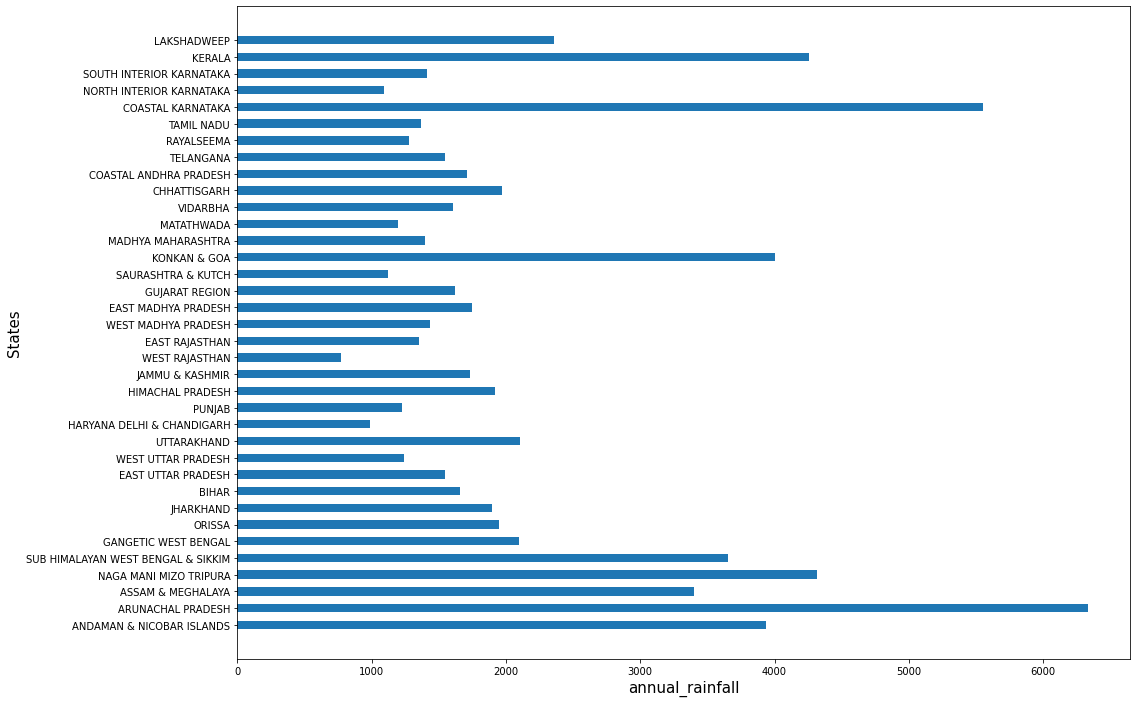

In [ ]:
state = no_na['SUBDIVISION']
annual_rainfall = no_na['ANNUAL']


fig = plt.figure(figsize=(16,12))


plt.barh(state,annual_rainfall,height=0.5, align='center')

plt.xlabel('annual_rainfall', fontsize=15)
plt.ylabel('States', fontsize=15)


# Maharashtra

In [ ]:
maha = no_na.loc[no_na['SUBDIVISION'] == 'MADHYA MAHARASHTRA']
maha

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
2622,MADHYA MAHARASHTRA,1901,18.8,0.6,7.7,36.6,30.4,107.7,215.9,194.1,83.7,68.7,4.4,0.5,769.0,19.4,74.7,601.4,73.5
2623,MADHYA MAHARASHTRA,1902,7.8,0.0,0.1,5.0,9.8,102.6,210.9,114.5,169.5,60.4,40.5,62.9,784.0,7.8,14.9,597.5,163.8
2624,MADHYA MAHARASHTRA,1903,7.6,0.0,0.0,3.2,77.2,86.3,281.8,155.5,142.3,74.2,7.6,2.2,837.9,7.6,80.4,665.9,84.1
2625,MADHYA MAHARASHTRA,1904,0.4,4.7,1.7,3.0,18.7,114.6,126.5,59.5,183.0,91.1,0.0,0.4,603.5,5.1,23.4,483.6,91.4
2626,MADHYA MAHARASHTRA,1905,0.0,1.2,0.0,2.3,23.6,65.0,252.8,79.0,52.6,52.9,8.3,0.0,537.8,1.2,25.9,449.5,61.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,MADHYA MAHARASHTRA,2011,0.0,0.3,0.3,5.0,2.9,133.3,261.4,238.1,148.4,62.8,0.0,0.0,852.6,0.3,8.2,781.3,62.8
2733,MADHYA MAHARASHTRA,2012,0.0,0.0,0.0,3.0,1.4,67.9,203.0,187.8,129.5,95.2,2.2,0.0,689.8,0.0,4.4,588.1,97.3
2734,MADHYA MAHARASHTRA,2013,0.1,5.3,0.8,5.7,6.0,212.4,311.8,147.0,210.3,57.8,4.0,1.3,962.4,5.3,12.4,881.5,63.1
2735,MADHYA MAHARASHTRA,2014,3.1,6.2,24.4,7.5,29.8,44.0,277.9,240.3,120.4,38.5,32.8,13.1,838.0,9.3,61.7,682.6,84.4


Text(0.5, 1.0, 'Maharashtra Rainfall Trend')

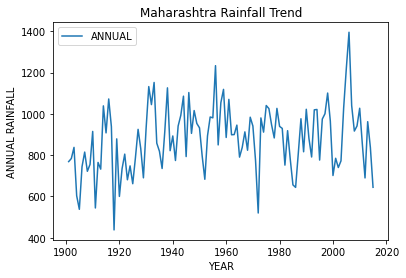

In [ ]:
maha.plot(x='YEAR' , y='ANNUAL')
plt.ylabel('ANNUAL RAINFALL')
plt.title('Maharashtra Rainfall Trend')

In [ ]:
#droping unwanted columns 
df2 = maha.iloc[:,:14]
df2

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
2622,MADHYA MAHARASHTRA,1901,18.8,0.6,7.7,36.6,30.4,107.7,215.9,194.1,83.7,68.7,4.4,0.5
2623,MADHYA MAHARASHTRA,1902,7.8,0.0,0.1,5.0,9.8,102.6,210.9,114.5,169.5,60.4,40.5,62.9
2624,MADHYA MAHARASHTRA,1903,7.6,0.0,0.0,3.2,77.2,86.3,281.8,155.5,142.3,74.2,7.6,2.2
2625,MADHYA MAHARASHTRA,1904,0.4,4.7,1.7,3.0,18.7,114.6,126.5,59.5,183.0,91.1,0.0,0.4
2626,MADHYA MAHARASHTRA,1905,0.0,1.2,0.0,2.3,23.6,65.0,252.8,79.0,52.6,52.9,8.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,MADHYA MAHARASHTRA,2011,0.0,0.3,0.3,5.0,2.9,133.3,261.4,238.1,148.4,62.8,0.0,0.0
2733,MADHYA MAHARASHTRA,2012,0.0,0.0,0.0,3.0,1.4,67.9,203.0,187.8,129.5,95.2,2.2,0.0
2734,MADHYA MAHARASHTRA,2013,0.1,5.3,0.8,5.7,6.0,212.4,311.8,147.0,210.3,57.8,4.0,1.3
2735,MADHYA MAHARASHTRA,2014,3.1,6.2,24.4,7.5,29.8,44.0,277.9,240.3,120.4,38.5,32.8,13.1


#January

In [ ]:
#selecting january
jan = maha[['YEAR','JAN']]

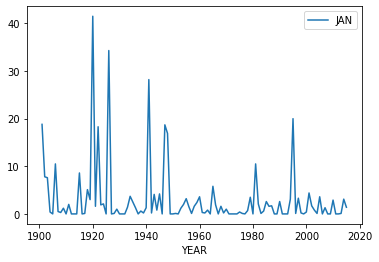

In [ ]:
jan.plot(x='YEAR',y='JAN')

In [ ]:
print(jan[:112])
jan[112:]

      YEAR   JAN
2622  1901  18.8
2623  1902   7.8
2624  1903   7.6
2625  1904   0.4
2626  1905   0.0
...    ...   ...
2729  2008   0.0
2730  2009   0.0
2731  2010   2.9
2732  2011   0.0
2733  2012   0.0

[112 rows x 2 columns]


,YEAR,JAN
2734,2013,0.1
2735,2014,3.1
2736,2015,1.4


In [ ]:
#train test
train = jan.iloc[:-12,1:]
print(train)
test = jan.iloc[-12:,1:]

test

       JAN
2622  18.8
2623   7.8
2624   7.6
2625   0.4
2626   0.0
...    ...
2720   0.0
2721   0.4
2722   4.4
2723   1.7
2724   0.8

[103 rows x 1 columns]


,JAN
2725,0.1
2726,3.6
2727,0.0
2728,1.3
2729,0.0
2730,0.0
2731,2.9
2732,0.0
2733,0.0
2734,0.1


# Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

scaled__train = scaler.transform(train)
scaled__test = scaler.transform(test) 

scaled__train
scaled__test

array([[0.00240964],
       [0.08674699],
       [0.        ],
       [0.0313253 ],
       [0.        ],
       [0.        ],
       [0.06987952],
       [0.        ],
       [0.        ],
       [0.00240964],
       [0.0746988 ],
       [0.03373494]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#batch generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled__train,scaled__train,length = n_input,batch_size = 1)

In [ ]:
X,y = generator[0]
print(X.flatten())
print(y)
X.shape

[0.45301205 0.18795181 0.18313253 0.00963855 0.         0.25301205
 0.01204819 0.00722892 0.02891566 0.         0.04819277 0.        ]
[[0.]]


(1, 12, 1)

#Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
#modeL

model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
#fit model

model.fit(generator,epochs=85)

Epoch 1/85
91/91 [==============================] - 2s 7ms/step - loss: 0.0317
Epoch 2/85
91/91 [==============================] - 1s 7ms/step - loss: 0.0300
Epoch 3/85
91/91 [==============================] - 1s 7ms/step - loss: 0.0299
Epoch 4/85
91/91 [==============================] - 1s 7ms/step - loss: 0.0296
Epoch 5/85
91/91 [==============================] - 1s 7ms/step - loss: 0.0302
Epoch 6/85
91/91 [==============================] - 1s 7ms/step - loss: 0.0301
Epoch 7/85
91/91 [==============================] - 1s 6ms/step - loss: 0.0299
Epoch 8/85
91/91 [==============================] - 1s 6ms/step - loss: 0.0296
Epoch 9/85
91/91 [==============================] - 1s 7ms/step - loss: 0.0304
Epoch 10/85
91/91 [==============================] - 1s 7ms/step - loss: 0.0297
Epoch 11/85
91/91 [==============================] - 1s 6ms/step - loss: 0.0297
Epoch 12/85
91/91 [==============================] - 1s 7ms/step - loss: 0.0298
Epoch 13/85
91/91 [==============================

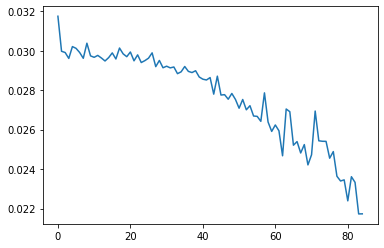

In [ ]:
# calculating loss

loss_epoch = model.history.history['loss']
plt.plot(range(len(loss_epoch)),loss_epoch)

In [ ]:
last_train_batch = scaled__train[-12:]
last_train_batch

array([[0.        ],
       [0.        ],
       [0.0746988 ],
       [0.48192771],
       [0.00240964],
       [0.07951807],
       [0.00481928],
       [0.        ],
       [0.00963855],
       [0.1060241 ],
       [0.04096386],
       [0.01927711]])

In [ ]:
last_train_batch = last_train_batch.reshape((1,12, 1))
print(last_train_batch.shape)

(1, 12, 1)


In [ ]:
model.predict(last_train_batch)

array([[0.04208477]], dtype=float32)

In [ ]:
scaled__test

array([[0.00240964],
       [0.08674699],
       [0.        ],
       [0.0313253 ],
       [0.        ],
       [0.        ],
       [0.06987952],
       [0.        ],
       [0.        ],
       [0.00240964],
       [0.0746988 ],
       [0.03373494]])

In [ ]:
test_predictions = []

first_eval_batch = scaled__train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input, n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

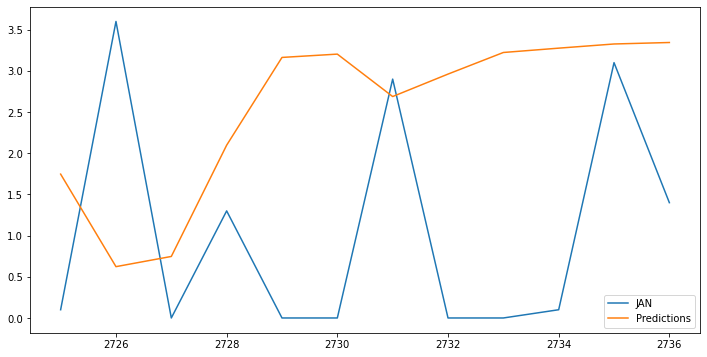

In [ ]:
test.plot(figsize = (12,6))